# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["wind"]["speed"]
        city_wind = city_weather["clouds"]["all"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay


Processing Record 2 of Set 1 | mbekenyera
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | aripuana
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | fang
Processing Record 7 of Set 1 | yanchep
Processing Record 8 of Set 1 | kulunda
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | borlange
City not found. Skipping...
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | chibougamau
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | ponferrada
Processing Record 15 of Set 1 | gadzhiyevo
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | saint-louis
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of Set 1 | betio village
Processing Record 24 of Set 1 | hawaiian paradi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,13.07,65,2.29,100,AU,1691066158
1,mbekenyera,-10.0000,38.9833,30.95,24,3.19,10,TZ,1691066158
2,port-aux-francais,-49.3500,70.2167,3.23,97,13.30,100,TF,1691066158
3,aripuana,-9.1667,-60.6333,29.69,47,0.87,0,BR,1691066158
4,atafu village,-8.5421,-172.5159,27.68,77,5.38,11,TK,1691066159


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.07,65,2.29,100,AU,1691066158
1,mbekenyera,-10.0000,38.9833,30.95,24,3.19,10,TZ,1691066158
2,port-aux-francais,-49.3500,70.2167,3.23,97,13.30,100,TF,1691066158
3,aripuana,-9.1667,-60.6333,29.69,47,0.87,0,BR,1691066158
4,atafu village,-8.5421,-172.5159,27.68,77,5.38,11,TK,1691066159


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

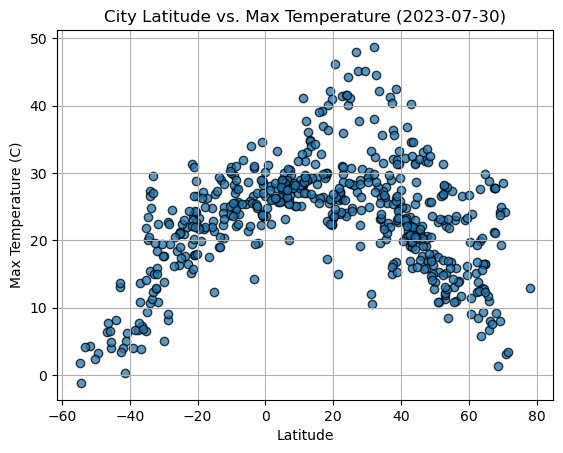

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors= "black", alpha =0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-07-30)")

# Show grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

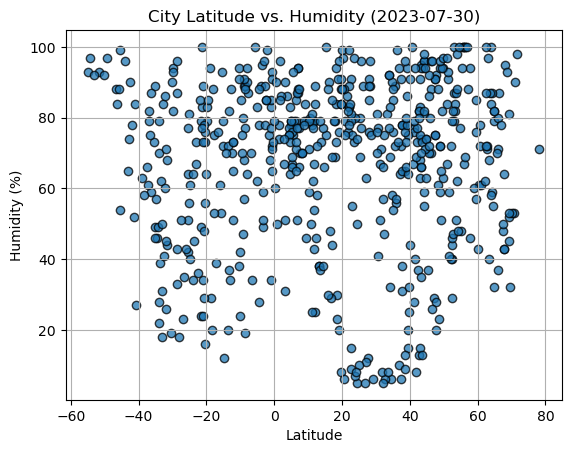

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors= "black", alpha =0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-30)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show grid & plot

plt.show()


#### Latitude Vs. Cloudiness

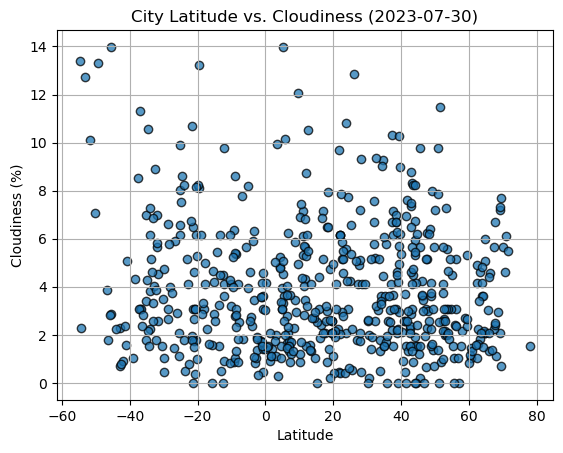

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors= "black", alpha =0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-30)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show grid & plot

plt.show()



#### Latitude vs. Wind Speed Plot

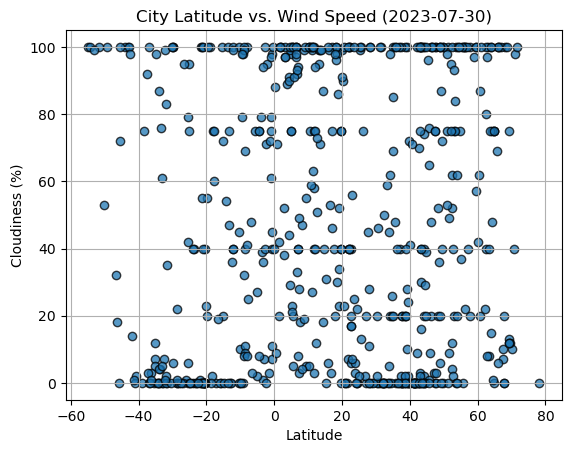

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors= "black", alpha =0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Wind Speed (2023-07-30)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show grid & plot

plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,fang,19.9169,99.2145,23.32,99,1.10,99,TH,1691066159
7,kulunda,52.5660,78.9385,28.14,40,2.67,62,RU,1691066160
10,chibougamau,49.9168,-74.3659,13.79,94,7.20,100,CA,1691066162
11,badger,64.8000,-147.5333,16.51,82,2.06,75,US,1691066162
12,ponferrada,42.5466,-6.5962,23.49,37,2.24,0,ES,1691066162


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.07,65,2.29,100,AU,1691066158
1,mbekenyera,-10.0000,38.9833,30.95,24,3.19,10,TZ,1691066158
2,port-aux-francais,-49.3500,70.2167,3.23,97,13.30,100,TF,1691066158
3,aripuana,-9.1667,-60.6333,29.69,47,0.87,0,BR,1691066158
4,atafu village,-8.5421,-172.5159,27.68,77,5.38,11,TK,1691066159


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.28633885640621504


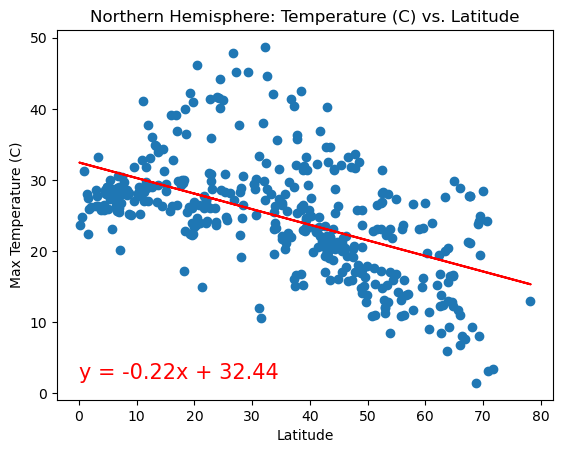

In [16]:
# Linear regression on Northern Hemisphere:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
# Get regression values
regress_values = northern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df["Lat"] ,northern_hemi_df["Max Temp"])

# Label plot and annotate the line equation
plt.plot(northern_hemi_df["Lat"] ,regress_values, "r-")
plt.annotate(line_eq_temp, (0,2) ,fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere: Temperature (C) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6220548038153338


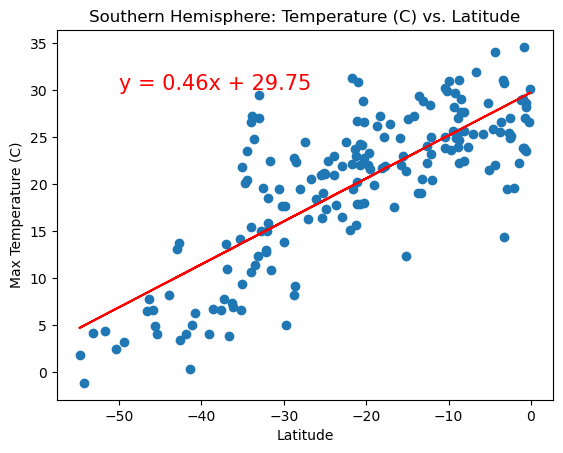

In [25]:
# Linear regression on Southern Hemisphere
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
# Get regression values
regress_values = southern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Label plot and annotate the line equation
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_temp,(-50,30), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere: Temperature (C) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere Graph (r-value: 0.28633885640621504):
The r-value of 0.286 suggests a positive correlation between the variables in the northern hemisphere. However, the correlation is relatively weak. As the r-value is closer to 0, it indicates that the relationship is not very strong, and there is significant variability in the data points. We can see the points on the graph do not align well with a straight line, and the relationship between the variables is not as consistent.

Southern Hemisphere Graph (r-value: 0.6220548038153338):
The r-value of 0.622 indicates a positive correlation in the southern hemisphere, and it is stronger compared to the northern hemisphere graph. The data points on this graph tend to be closer to a straight line, and the relationship between the variables is more consistent.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 1.09689701256758e-06


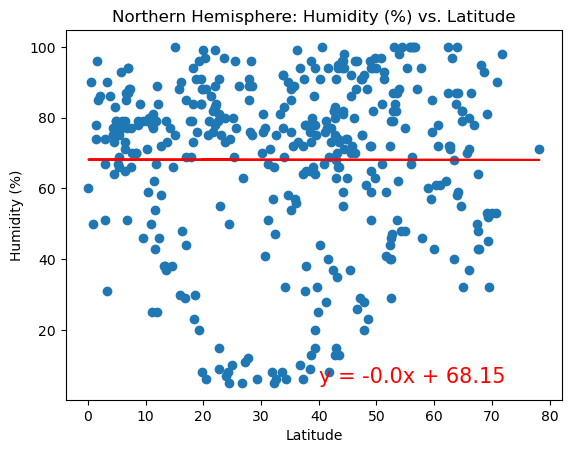

In [18]:
# Northern Hemisphere
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
# Get regression values
regress_values = northern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_hum = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Label plot and annotate the line equation
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_hum,(40,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0011011832992115723


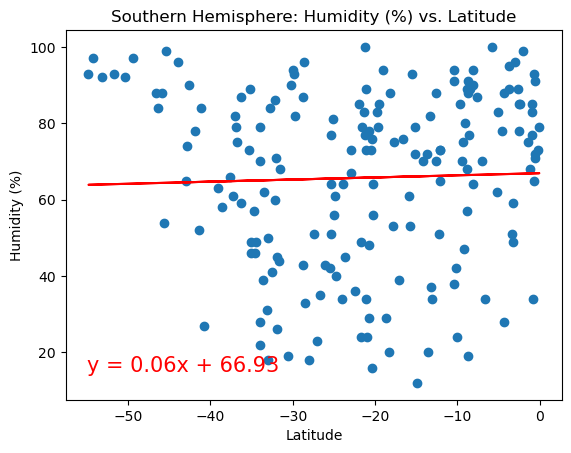

In [19]:
# Southern Hemisphere
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
# Get regression values
regress_values = southern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_hum = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Label plot and annotate the line equation
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_hum,(-55,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere Graph (r-value: 1.09689701256758e-06):
An r-value very close to zero in the northern hemisphere graph indicates that there is almost no linear correlation between the variables. The data points appear scattered without showing a clear linear trend.

Southern Hemisphere Graph (r-value: 0.0011011832992115723):
Similarly, an r-value very close to zero in the southern hemisphere graph suggests that there is almost no linear correlation between the variables in the southern hemisphere. The data points also appear scattered without a strong linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.001350195992242467


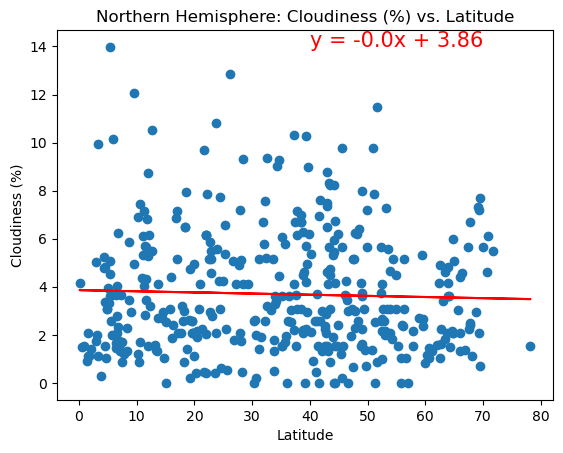

In [20]:
# Northern Hemisphere
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
# Get regression values
regress_values = northern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_cloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Label plot and annotate the line equation
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_cloud,(40,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.06953443002508912


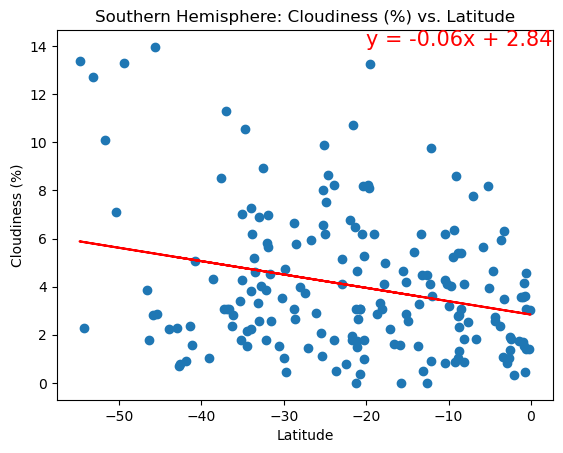

In [21]:
# Southern Hemisphere
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
# Get regression values
regress_values = southern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_cloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Label plot and annotate the line equation
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_cloud,(-20,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



**Discussion about the linear relationship:** Northern Hemisphere Graph (r-value: 0.001350195992242467):
An r-value of 0.001350195992242467 in the northern hemisphere graph suggests a very weak positive linear correlation between the variables. While the correlation is positive, it is extremely close to zero, indicating that there is almost no linear relationship between the variables. The data points appear scattered, and the relationship is not well described by a straight line.

Southern Hemisphere Graph (r-value: 0.06953443002508912):
An r-value of 0.06953443002508912 in the southern hemisphere graph also suggests a weak positive linear correlation between the variables. Compared to the northern hemisphere graph, the southern hemisphere graph shows a slightly stronger positive correlation, but it is still relatively weak. The data points exhibit more clustering around a general trend, but there is still considerable variability.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007613310629255408


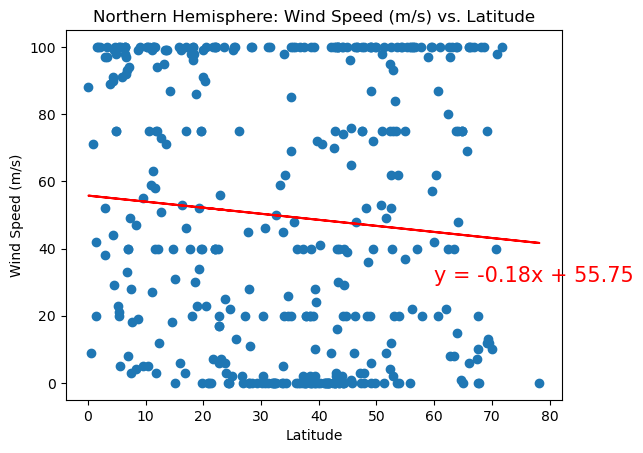

In [22]:
# Northern Hemisphere
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
# Get regression values
regress_values = northern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Label plot and annotate the line equation
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_wind,(60,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.0009517155315567345


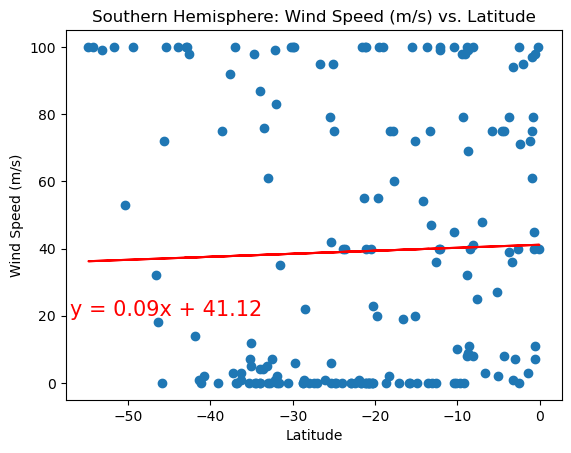

In [23]:
# Southern Hemisphere
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
# Get regression values
regress_values = southern_hemi_df["Lat"]*slope + intercept
# Create line equation string
line_eq_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Label plot and annotate the line equation
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq_wind,(-57,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**Northern Hemisphere Graph (r-value: 0.007613310629255408):
The r-value of 0.007613310629255408 in the northern hemisphere graph suggests an  weak positive linear correlation between the variables. The r-value is very close to zero, indicating that the relationship is almost negligible. The data points  appear scattered, and it is challenging to identify a clear linear trend.

Southern Hemisphere Graph (r-value: 0.0009517155315567345):
Similarly, the r-value of 0.0009517155315567345 in the southern hemisphere graph also suggests an weak positive linear correlation between the variables. Similar to the northern hemisphere graph, the r-value is very close to zero, indicating that the relationship is almost negligible. The variability is high.